In [47]:
import re
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score

from wordcloud import WordCloud as WC
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
#sns.set(rc={'figure.figsize':(20,13)})
sns.axes_style('darkgrid')
#sns.axes_style("whitegrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [2]:
group1 = 'Genesis'
group2 = 'Soundgarden'

In [3]:
def readsongtitles(Band,longorshort='short'):
    
    List = []
    if longorshort == 'short':
        print('reading short list')
        with open (f"web_scraping_cf/DataMusic/{Band}_list.txt",'r') as file:
            List = file.read()
            liste = List.splitlines()
    elif longorshort == 'long':
        print('reading long list')
        with open (f"web_scraping_cf/DataMusic/{Band}_list_long.txt",'r') as file:
            List = file.read()
            liste = List.splitlines()
    else :
        liste = []
        return f"not valid, only 'long' / 'short'"
    
    return liste


In [4]:
def grabcontent(grouplist): # from file
    content = []
    print(f"start reading files")
    for i in grouplist:
        #print(i)
        with open (f"web_scraping_cf/DataMusic/{i}.txt",'r') as g:
            content.append(' '.join(g.read().split()))
    print(f"end reading files")
    return content


In [5]:
group1list = readsongtitles(group1,'short')
group2list =  readsongtitles(group2,'short')

reading short list
reading short list


In [6]:
group1content = grabcontent(group1list)
group2content = grabcontent(group2list)

start reading files
end reading files
start reading files
end reading files


In [11]:
type(group1content)

list

In [ ]:
print(len(group1list),len(group2list))

In [7]:
corpus = group1content + group2content

In [8]:
cv = CountVectorizer(stop_words='english')

In [9]:
cv.fit(corpus)
out = cv.transform(corpus)
cv.get_feature_names_out()

array(['619', '77', 'abacab', ..., 'yihla', 'young', 'youth'],
      dtype=object)

In [10]:
out.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
df_songs = pd.DataFrame( out.todense() , columns = cv.get_feature_names_out() )
df_songs

,619,77,abacab,ability,aching,add,admit,admits,aerosol,afraid,...,yea,yeah,year,years,yes,yesterday,yield,yihla,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,6,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
tf = TfidfTransformer()
transformed = tf.fit_transform(out)
transformed

<60x1323 sparse matrix of type '<class 'numpy.float64'>'
	with 2796 stored elements in Compressed Sparse Row format>

In [13]:
tdf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names_out())
tdf.round(4)


,619,77,abacab,ability,aching,add,admit,admits,aerosol,afraid,...,yea,yeah,year,years,yes,yesterday,yield,yihla,young,youth
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1337,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.5302,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0445,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [14]:
X = tdf.values
y = [group1] * len(group1list) + [group2] * len(group2list)
y

['Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden']

In [15]:
x_train = X
y_train = y

In [16]:
modelgrid = make_pipeline(
    MultinomialNB()
)

In [17]:
modelgrid.get_params()

{'memory': None,
 'steps': [('multinomialnb', MultinomialNB())],
 'verbose': False,
 'multinomialnb': MultinomialNB(),
 'multinomialnb__alpha': 1.0,
 'multinomialnb__class_prior': None,
 'multinomialnb__fit_prior': True}

In [18]:
# define which hyperparameters we want to search and the values that should be used

para_grid = {
            #'verbose': [True, False],
            'multinomialnb__alpha': [0.001,0.01,0.1,1.0,10,100]
            }

In [19]:
# define your gridsearch

grid_cv = GridSearchCV(
            estimator= modelgrid, # the model!
            param_grid= para_grid, # hyperparameters to compare
            cv=5, # folds
            return_train_score=True,
            #scoring= score,
            n_jobs=-1, # how many cores to use on your computer, -1 uses all
)

In [20]:
# fit all the models with the different combinations

grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'multinomialnb__alpha': [0.001, 0.01, 0.1, 1.0, 10,
                                                  100]},
             return_train_score=True)

In [21]:

# put the results into a dataframe

grid_cv_results = pd.DataFrame(grid_cv.cv_results_)

In [22]:
grid_cv.best_params_

{'multinomialnb__alpha': 0.01}

In [23]:
m = MultinomialNB(alpha=0.01)
m.fit(x_train, y_train)

MultinomialNB(alpha=0.01)

In [24]:
m.score(x_train, y_train)

1.0

In [25]:
m.predict_proba(x_train) 

array([[9.99999657e-01, 3.42574413e-07],
       [9.99998433e-01, 1.56667650e-06],
       [9.97151453e-01, 2.84854723e-03],
       [9.99968207e-01, 3.17930950e-05],
       [9.99489922e-01, 5.10077840e-04],
       [9.99978630e-01, 2.13702288e-05],
       [9.98471983e-01, 1.52801673e-03],
       [9.90821278e-01, 9.17872169e-03],
       [9.99965919e-01, 3.40809522e-05],
       [9.99360106e-01, 6.39894383e-04],
       [9.99951361e-01, 4.86388907e-05],
       [9.99472933e-01, 5.27066620e-04],
       [9.98860639e-01, 1.13936106e-03],
       [9.99951153e-01, 4.88472340e-05],
       [9.99988756e-01, 1.12440145e-05],
       [9.98656368e-01, 1.34363233e-03],
       [9.99995918e-01, 4.08192771e-06],
       [9.99977553e-01, 2.24465365e-05],
       [9.99980330e-01, 1.96699218e-05],
       [9.99954895e-01, 4.51050017e-05],
       [9.95731871e-01, 4.26812883e-03],
       [9.99997851e-01, 2.14930440e-06],
       [9.99987879e-01, 1.21213021e-05],
       [9.99951432e-01, 4.85680403e-05],
       [9.999847

In [26]:
y_train

['Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Genesis',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden',
 'Soundgarden']

In [27]:
m.predict(x_train)

array(['Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis',
       'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis',
       'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis',
       'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis',
       'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis', 'Genesis',
       'Soundgarden', 'Soundgarden', 'Soundgarden', 'Soundgarden',
       'Soundgarden', 'Soundgarden', 'Soundgarden', 'Soundgarden',
       'Soundgarden', 'Soundgarden', 'Soundgarden', 'Soundgarden',
       'Soundgarden', 'Soundgarden', 'Soundgarden', 'Soundgarden',
       'Soundgarden', 'Soundgarden', 'Soundgarden', 'Soundgarden',
       'Soundgarden', 'Soundgarden', 'Soundgarden', 'Soundgarden',
       'Soundgarden', 'Soundgarden', 'Soundgarden', 'Soundgarden',
       'Soundgarden', 'Soundgarden'], dtype='<U11')

In [28]:
longlistg1 = readsongtitles(group1,'long')
longlistg2 = readsongtitles(group2,'long')

reading long list
reading long list


In [29]:
print(len(longlistg1))
print(len(longlistg2))

2657
1166


In [89]:
def grabnewlyrics(listentry): # from internet
    x = 0
    y = 0
    contentfkt = []
#    print(listentry)
    for i in listentry :
#        print(i)
        response = requests.get(i)
        newlyricshtml = response.text
        bandnames00 = re.findall('\d+\W(\w+)\W.+',i)

        try :
            names = re.findall('\d+\W\w+\W(.+)',i)
            soup = BeautifulSoup(newlyricshtml,'lxml')
            body_text = soup.find(id="lyric-body-text")
            body_text_clean = body_text.text
            with open(f"web_scraping_cf/DataMusic/test/{names[0]}.txt", "w") as f:
                f.write(body_text_clean)
            contentfkt.append(' '.join(body_text_clean.split()))
            y = y + 1
            print(f"{i} grabbed")
        except:
            x = x + 1
    
    print(f"{bandnames00[0]} - {x} lyrics missing, {y} lyrics grabbed")
    return contentfkt

In [ ]:
longlistg1[170:185]

In [ ]:
longlistg2[100:116]

In [90]:
fromlonglist1 = longlistg1[170:172]
fromlonglist2 = longlistg2[98:100]
newsong1 = grabnewlyrics(fromlonglist1)
newsong2 = grabnewlyrics(fromlonglist2)

Genesis - 2 lyrics missing, 0 lyrics grabbed
http://www.lyrics.com/lyric/33248428/Soundgarden/Smokestack+Lightning grabbed
http://www.lyrics.com/lyric/31566269/Soundgarden/One+Minute+of+Silence grabbed
Soundgarden - 0 lyrics missing, 2 lyrics grabbed


In [40]:
corpusX = newsong1 + newsong2

In [41]:
counts = cv.transform(corpusX)
tfcounts = tf.transform(counts)
m.predict(tfcounts)


array(['Genesis', 'Genesis', 'Soundgarden', 'Soundgarden', 'Genesis',
       'Soundgarden', 'Genesis'], dtype='<U11')

In [42]:
m.predict_proba(tfcounts) 

array([[6.15821243e-01, 3.84178757e-01],
       [9.99999657e-01, 3.42574413e-07],
       [1.21579387e-02, 9.87842061e-01],
       [1.64276714e-05, 9.99983572e-01],
       [9.68122504e-01, 3.18774965e-02],
       [4.04718274e-02, 9.59528173e-01],
       [7.60475780e-01, 2.39524220e-01]])

In [43]:
pd.DataFrame(tfcounts.todense(), columns=cv.get_feature_names_out())

,619,77,abacab,ability,aching,add,admit,admits,aerosol,afraid,...,yea,yeah,year,years,yes,yesterday,yield,yihla,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.088549,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.138147,0.0,0.050949,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.044099,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.040129,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [44]:
genesiswords = " ".join(group1content)
soundgardenwords = " ".join(group2content)

In [48]:

# Generate a word cloud image
genesiscloud = WC(background_color="white",width=1440, height=900).generate(genesiswords)
soundgardencloud = WC(background_color="white",width=1440, height=900).generate(soundgardenwords)

(-0.5, 1439.5, 899.5, -0.5)

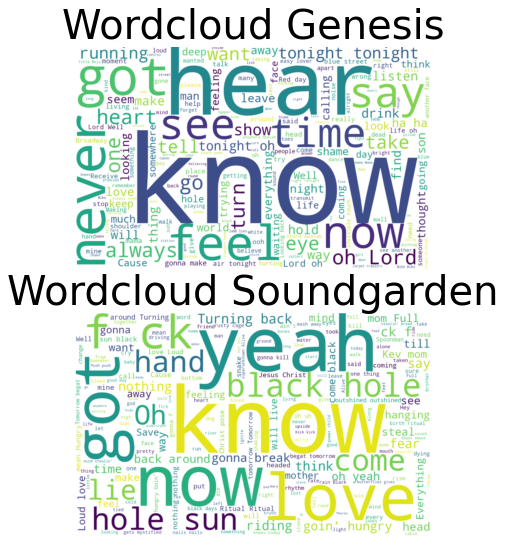

In [50]:
plt.figure(figsize=(14.4, 9))

plt.subplot(2,1,1)
plt.title('Wordcloud Genesis', fontdict = {'fontsize' : 40})
plt.imshow(genesiscloud, interpolation="bilinear")
#plt.grid(None)
plt.axis('off')


plt.subplot(2,1,2)
plt.title('Wordcloud Soundgarden', fontdict = {'fontsize' : 40})
plt.imshow(soundgardencloud, interpolation="bilinear")
#plt.grid(None)
plt.axis('off')

#plt.show()
